<div>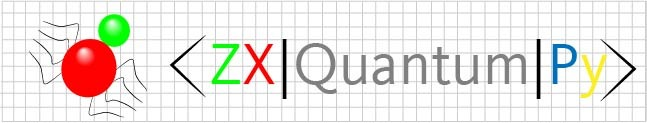</div>

# py<span style="color:green">Z</span><span style="color:red">X</span> 

In this Notebook, we will learn about
- software package called pyZX: installating and importing pyZX
- creating ZX-Diagram
- creating quantum circuits using pyZX
- rewriting quantum circuit as ZX-Diagram 
- representing the circuit in QASM language
- from QASM to ZX-ciruit
- ZX-diagram editor

pyZX is a python tool implementing the theory of ZX-calculus developed by Aleks Kissinger and John van de Wetering. For more details go through [this article](https://arxiv.org/pdf/1904.04735.pdf). This pyzx package can be used for quantum circuit rewriting, simplification and optimisation using the ZX-calculus.

### Installation
To install pyzx as a Python library use the following command:

``` pip install pyzx ```

### Using pyZX
After installation, to import the pyzx package in the notebook, use the following:

In [1]:
import pyzx as zx

### Creating ZX-Diagram
First, we construct an empty ZX-diagram by calling ```zx.Graph()``` function as

In [2]:
ex1 = zx.Graph()

Now, to add vertices we use ```add_vertex()``` function, which is given as

```add_vertex(Vertex_Type, qubit, row, phase)```

here, ```Vertex_Type``` as the name suggets, denotes the type of the vertex we wish to include in our ZX-diagram or in other words ZX-graph. There are four types of vertex, which can be ```BOUNDARY```, ```Z```, ```X``` and ```H_BOX```. Numerical values of these types are ```0``` for ```BOUNDARY```, ```1``` for ```Z```, ```2``` for ```X``` and ```3``` for ```H_BOX```.

```qubit``` and ```row``` denote the qubit and the level to which we want to include the particular vertex. The last parameter here is ```phase``` and the default value of this is ```0```. While writing the command to include a vertex, we can skip the name of arguments and simply putting the corresponding numbers as arguments. And to display the ZX-Diagram we use ```zx.draw(name_of_the_graph)```

So, let's start with adding 4 vertices to our ZX-diagram, one with each type and displaying it:

In [3]:
v1 = ex1.add_vertex(zx.VertexType.BOUNDARY, qubit=0, row=0) # this is a boundary vertex on 0th level
v2 = ex1.add_vertex(1,0,1) # this is a Z vertex on the same qubit and in the 1st level
v3 = ex1.add_vertex(2,0,2) # this is a X vertex on the same qubit and in the 2nd level
v4 = ex1.add_vertex(3,0,3) # this is a H-Box on the same qubit and in the 3rd level
zx.draw(ex1) # this is to display the newly created ZX-Diagram

As in the above diagram, we have 4 vertices, but there is no connection between them. To connect the vertices or in other words to add an edge in the ZX-diagram, we use ```add_edge()``` function, defined as

```add_edge((vertex1,vertex2),EdgeType)```

here, ```EdgeType``` is the type of edge we wish to add between the pair of vertices ```(vertex1,vertex2)```. We have two types of edges with this pyZX library, which are ```SIMPLE = 1``` and ```HADAMARD = 2```. By default the edge type is ```SIMPLE```.

Now, the connections between the vertices can be done by using:

In [4]:
ex1.add_edge((v1,v2),zx.EdgeType.SIMPLE) # this is a SIMPLE type edge between the pair of vertices (v1,v2)
ex1.add_edge((v2,v3)) # this is also a SIMPLE type edge between the pair of vertices (v2,v3)
ex1.add_edge((v3,v4),2) # this is a HADAMARD type edge between the pair of vertices (v3,v4)
zx.draw(ex1)

Now, as we have considered creating a ZX-Diagram, adding vertices and edges to it, let's create a ZX-Diagram with 2 qubits and 4 vertices on each qubit.

In [5]:
ex2 = zx.Graph() # creating an empty graph
v01 = ex2.add_vertex(0,0,0) # this is a boundary vertex on the 0th qubit and in 0th level
v02 = ex2.add_vertex(1,0,1) # this is a Z vertex on the 0th qubit and in the 1st level
v03 = ex2.add_vertex(2,0,2) # this is a X vertex on the 0th qubit and in the 2nd level
v04 = ex2.add_vertex(0,0,3) # again a boundary vertex on the 0th qubit and in 3rd level

v11 = ex2.add_vertex(0,1,0) # this is a boundary vertex on the 1st qubit and in 0th level
v12 = ex2.add_vertex(2,1,1) # this is a X vertex on the 1st qubit and in the 1st level
v13 = ex2.add_vertex(1,1,2) # this is a Z vertex on the 1st qubit and in the 2nd level
v14 = ex2.add_vertex(0,1,3) # again a boundary vertex on the 1st qubit and in 3rd level

ex2.add_edges([(v01,v02),(v02,v03),(v03,v04),(v11,v12),(v12,v13),(v13,v14),(v02,v12)]) # this is another way to add multiple edges to the graph by giving a list of pairs of vertices. Please note that here we have used 'add_edges' in place previously used 'add_edge'

zx.draw(ex2) # to display the graph

### Creating quantum circuits using pyZX

We can also create a quantum circuit using the pyzx library. The function for the same is ```Circuit(num_of_qubits)```, which by default add the boundary vertices and make connections between them.

In [6]:
ex3=zx.Circuit(3) # generating a quantum circuit with 3 qubits
zx.draw(ex3) # drawing the circuit

To add gates in the circuit, we use ```add_gate(gate,qubits)```. Examples of single qubit gates are ```NOT```(Pauli-X gate), ```HAD```(Hadamard gate), ```Z```(Pauli-Z gate), ```S```(sqaure root of ```Z``` gate), ```T```(sqaure root of ```S``` gate). ```XPhase``` and ```ZPhase``` are also single qubit gates in this case, in addition to qubit, we also have to give value for the phase. Two qubit gates are ```CZ```, ```CNOT``` here 'C' is signify the control gates and another example of two qubit gate is ```SWAP```. And for three-qubits we have ```CCZ``` and ```TOF``` gates.

Now, we are going to add some gates to our circuit:

In [7]:
ex3.add_gate("S",0) # adding S gate to qubit 0
ex3.add_gate("CNOT",0,2) # adding CNOT gate to qubits 0 and 2, with 0 as control qubit
ex3.add_gate("TOF",0,1,2) # adding tofolli gate to qubits 0, 1 and 2
zx.draw(ex3) #displaying the circuit

### Rewriting quantum circuit as ZX-Diagram
We can also change the given circuit to a ZX-graph by using ```to_graph()``` function

In [8]:
ex3_g=ex3.to_graph() # rewriting the circuit as ZX-Diagram
zx.draw(ex3_g) # displaying it

### Representing the above circuit in QASM language:
It is also possible to represent the pyZX circuit in QASM language:

In [9]:
print(ex3.to_qasm()) # printing the QASM code for our ZX-circuit

OPENQASM 2.0;
include "qelib1.inc";
qreg q[3];
s q[0];
cx q[0], q[2];
ccx q[0], q[1], q[2];



### From QASM to ZX-diagram

In [10]:
ex4=zx.qasm("""
qreg q[3];
s q[0];
cx q[0], q[2];
ccx q[0], q[1], q[2];
""")
zx.draw(ex4) # this is to create a ZX-diagram from QASM code

To compare the two circuits, just feed the circuit objects directly to compare_tensors function as

In [11]:
zx.compare_tensors(ex3, ex4) # comparing if two ZX-circuits are equivalent, result in True if yes, False if not

True

### The ZX-diagram editor
We can also use the build-in graphical editor to build an arbitrarily shaped ZX-diagram by using ```editor.edit(graph)```. In this case the output cell will be the editor and we can modify the graph by simply selecting the vertex or edge and clicking the buttons available in the editor.

In [12]:
e=zx.editor.edit(ex2) # build-in graphical editor to edit our previously created graph ex2

ZXEditorWidget(graph_buttons='{"spider": {"active": false, "text": "fuse spiders", "tooltip": "Fuses connected…

Output()

That's all for the beginning part of pyZX library, in the next notebook we will go through the simplification of ZX-Diagrams.
